In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import *
from src.visualization import *
from src.evaluation import *
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
keras.backend.set_floatx('float64')

Using TensorFlow backend.


# Load Data

In [2]:
EPOCHS = 20
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 100
LOSS = yamen
FEATURES_NUMBER = 1
OUTPUT_SIZE = HORIZON*2

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE, FEATURES_NUMBER)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE, FEATURES_NUMBER)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE, FEATURES_NUMBER)

# Train The Model

In [3]:

model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
                output_size=OUTPUT_SIZE, learning_rate=0.001, loss = LOSS,
                dropout_ratio = 0.3, features_number = FEATURES_NUMBER)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)

Epoch 1/20
129/129 [==============================] - 29s 226ms/step - loss: 53468.3362 - val_loss: 242998.4445
Epoch 2/20
129/129 [==============================] - 28s 213ms/step - loss: 32354.2020 - val_loss: 418.2240
Epoch 3/20
129/129 [==============================] - 28s 213ms/step - loss: 13000148.8394 - val_loss: 35391.4156
Epoch 4/20
129/129 [==============================] - 28s 219ms/step - loss: 11447.9403 - val_loss: 3.0491
Epoch 5/20
129/129 [==============================] - 28s 214ms/step - loss: 2061.1194 - val_loss: 1.2902
Epoch 6/20
129/129 [==============================] - 28s 214ms/step - loss: 903.1982 - val_loss: 5.5993
Epoch 7/20
129/129 [==============================] - 28s 213ms/step - loss: 111.5825 - val_loss: 1.4263
Epoch 8/20
129/129 [==============================] - 28s 214ms/step - loss: 11.0830 - val_loss: 0.8563
Epoch 9/20
129/129 [==============================] - 28s 214ms/step - loss: 1.6804 - val_loss: 0.7279
Epoch 10/20
129/129 [==============

# Save The Model

In [4]:
MODEL_BASE_DIR = '../models/with_kl/3-LSTM'
model.save(MODEL_BASE_DIR)

Saved model files to disk under../models/with_kl/3-LSTM/3


# Get Best And Worst Predictions

Best Predection Error is    36.3442
Worst Predection Error is   154.2298


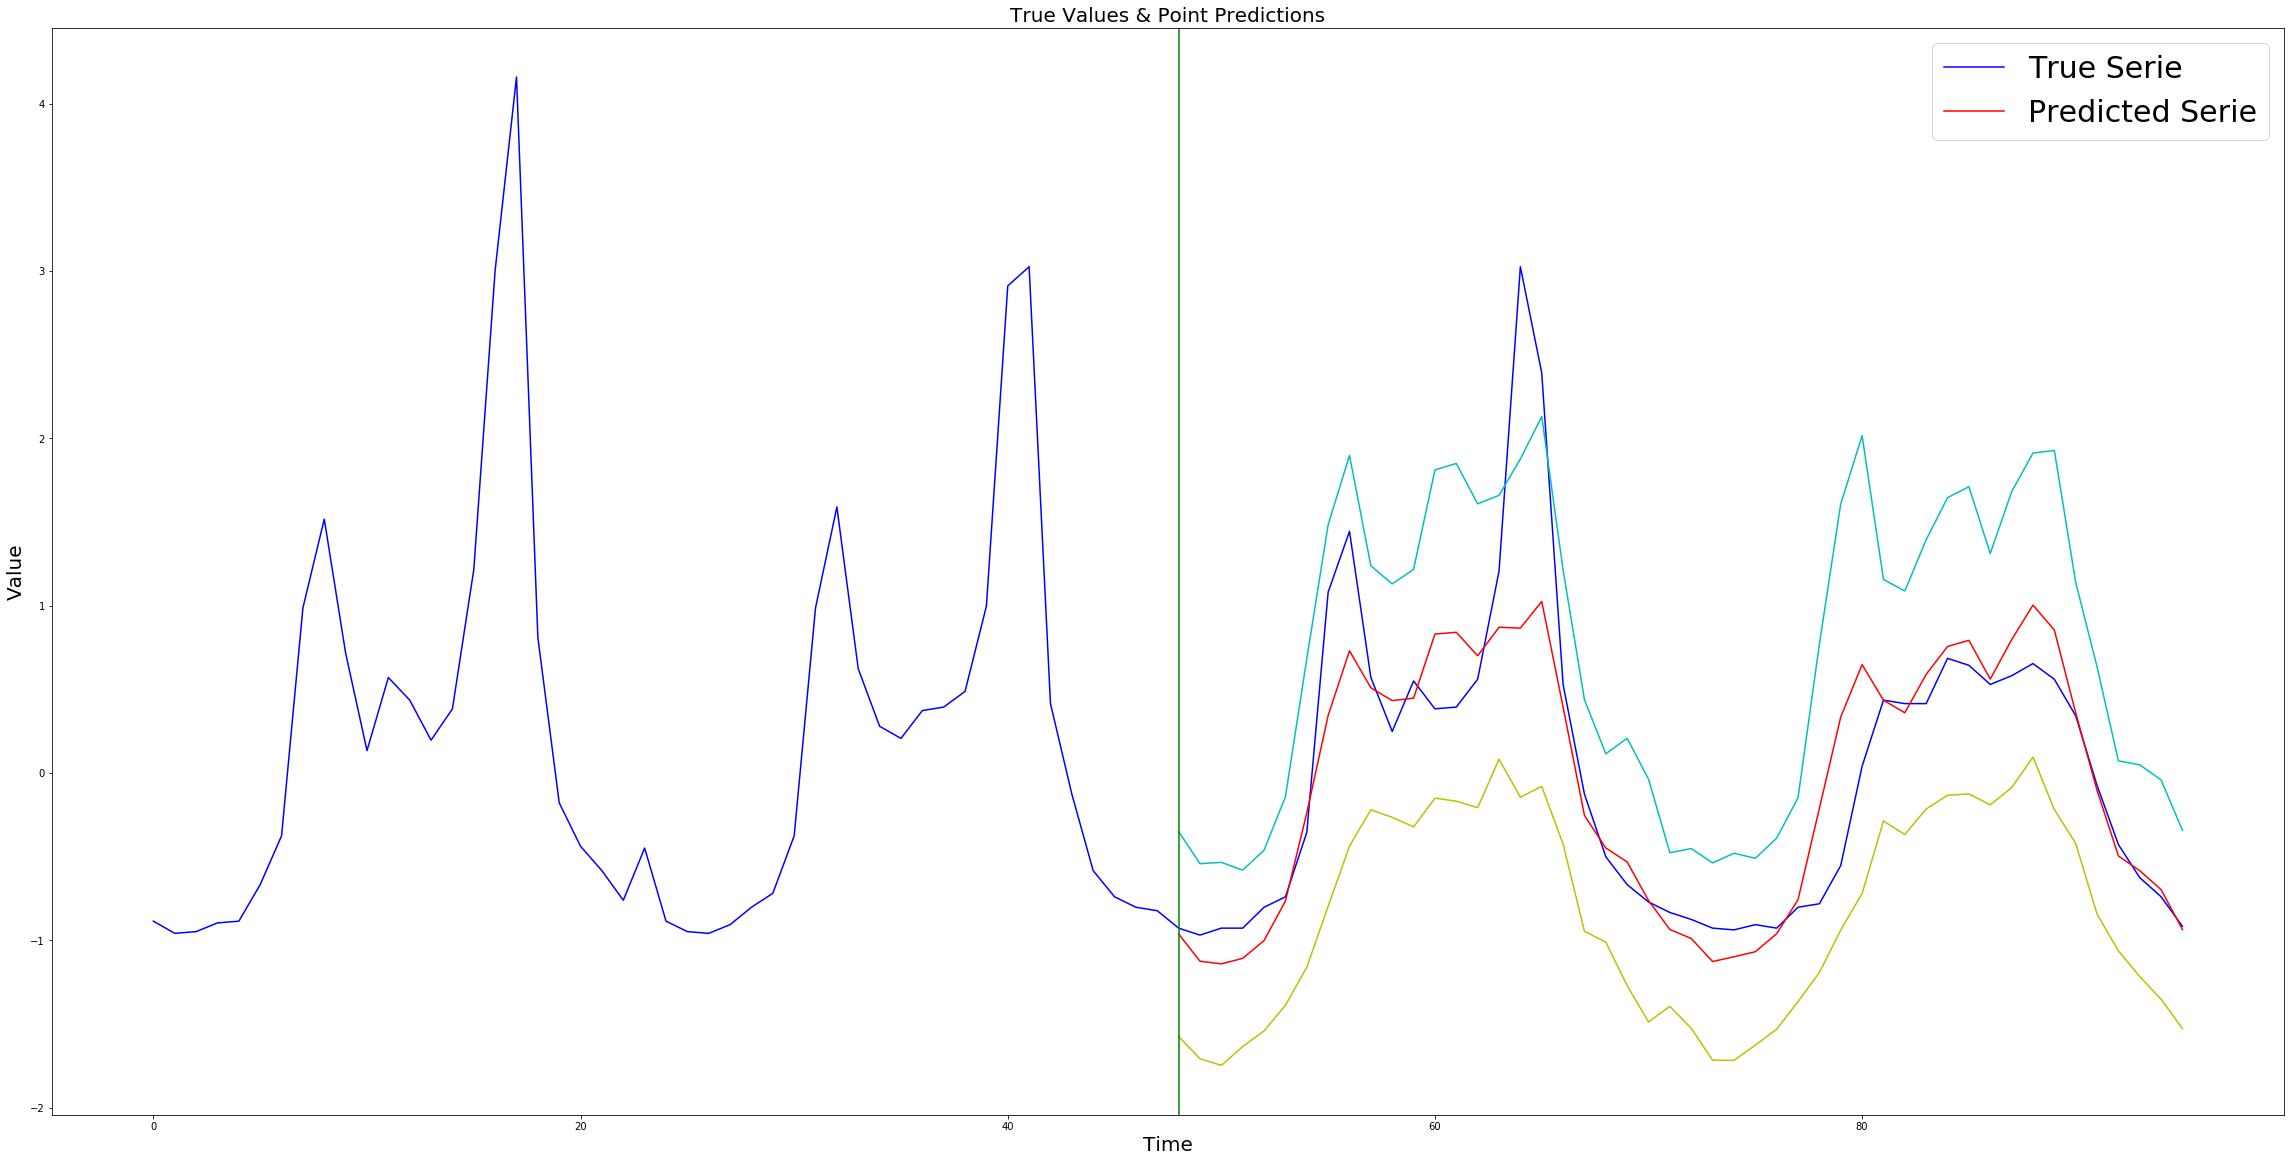

In [7]:
#model = M4Model()
#model.load('../models/with_kl/3-LSTM/3')

x, y, prediction, error =  sort_by_prediction_error(model,validate_x, validate_y, 
                                                    smape, features_number=FEATURES_NUMBER,
                                                    output_size = OUTPUT_SIZE)

print(f'Best Predection Error is {error[0]:10.4f}')
print(f'Worst Predection Error is {error[x.shape[0]-1]:10.4f}')

#plot_serie_and_prediction(x[:,:48], y[:,:48], prediction[:,:48], serie_indx=0)
#plot_serie_and_prediction(x[:,:48], y[:,:48], prediction[:,:48], serie_indx= x.shape[0]-1)
#plot_serie_and_prediction(x[:,:48], y[:,:48], prediction[:,:48] + prediction[:,-48:], serie_indx= 0)
#plot_serie_and_prediction(x[:,:48], y[:,:48], prediction[:,:48] - prediction[:,-48:], serie_indx= 0)
lower_bound = prediction[:,:48] - tf.abs(prediction[:,-48:])
upper_bound = prediction[:,:48] + tf.abs(prediction[:,-48:])
plot_serie_with_bounds(x[:,:48], y[:,:48], prediction[:,:48], lower_bound, upper_bound, serie_indx=0 )

# PLot Specific Serie From A Batch

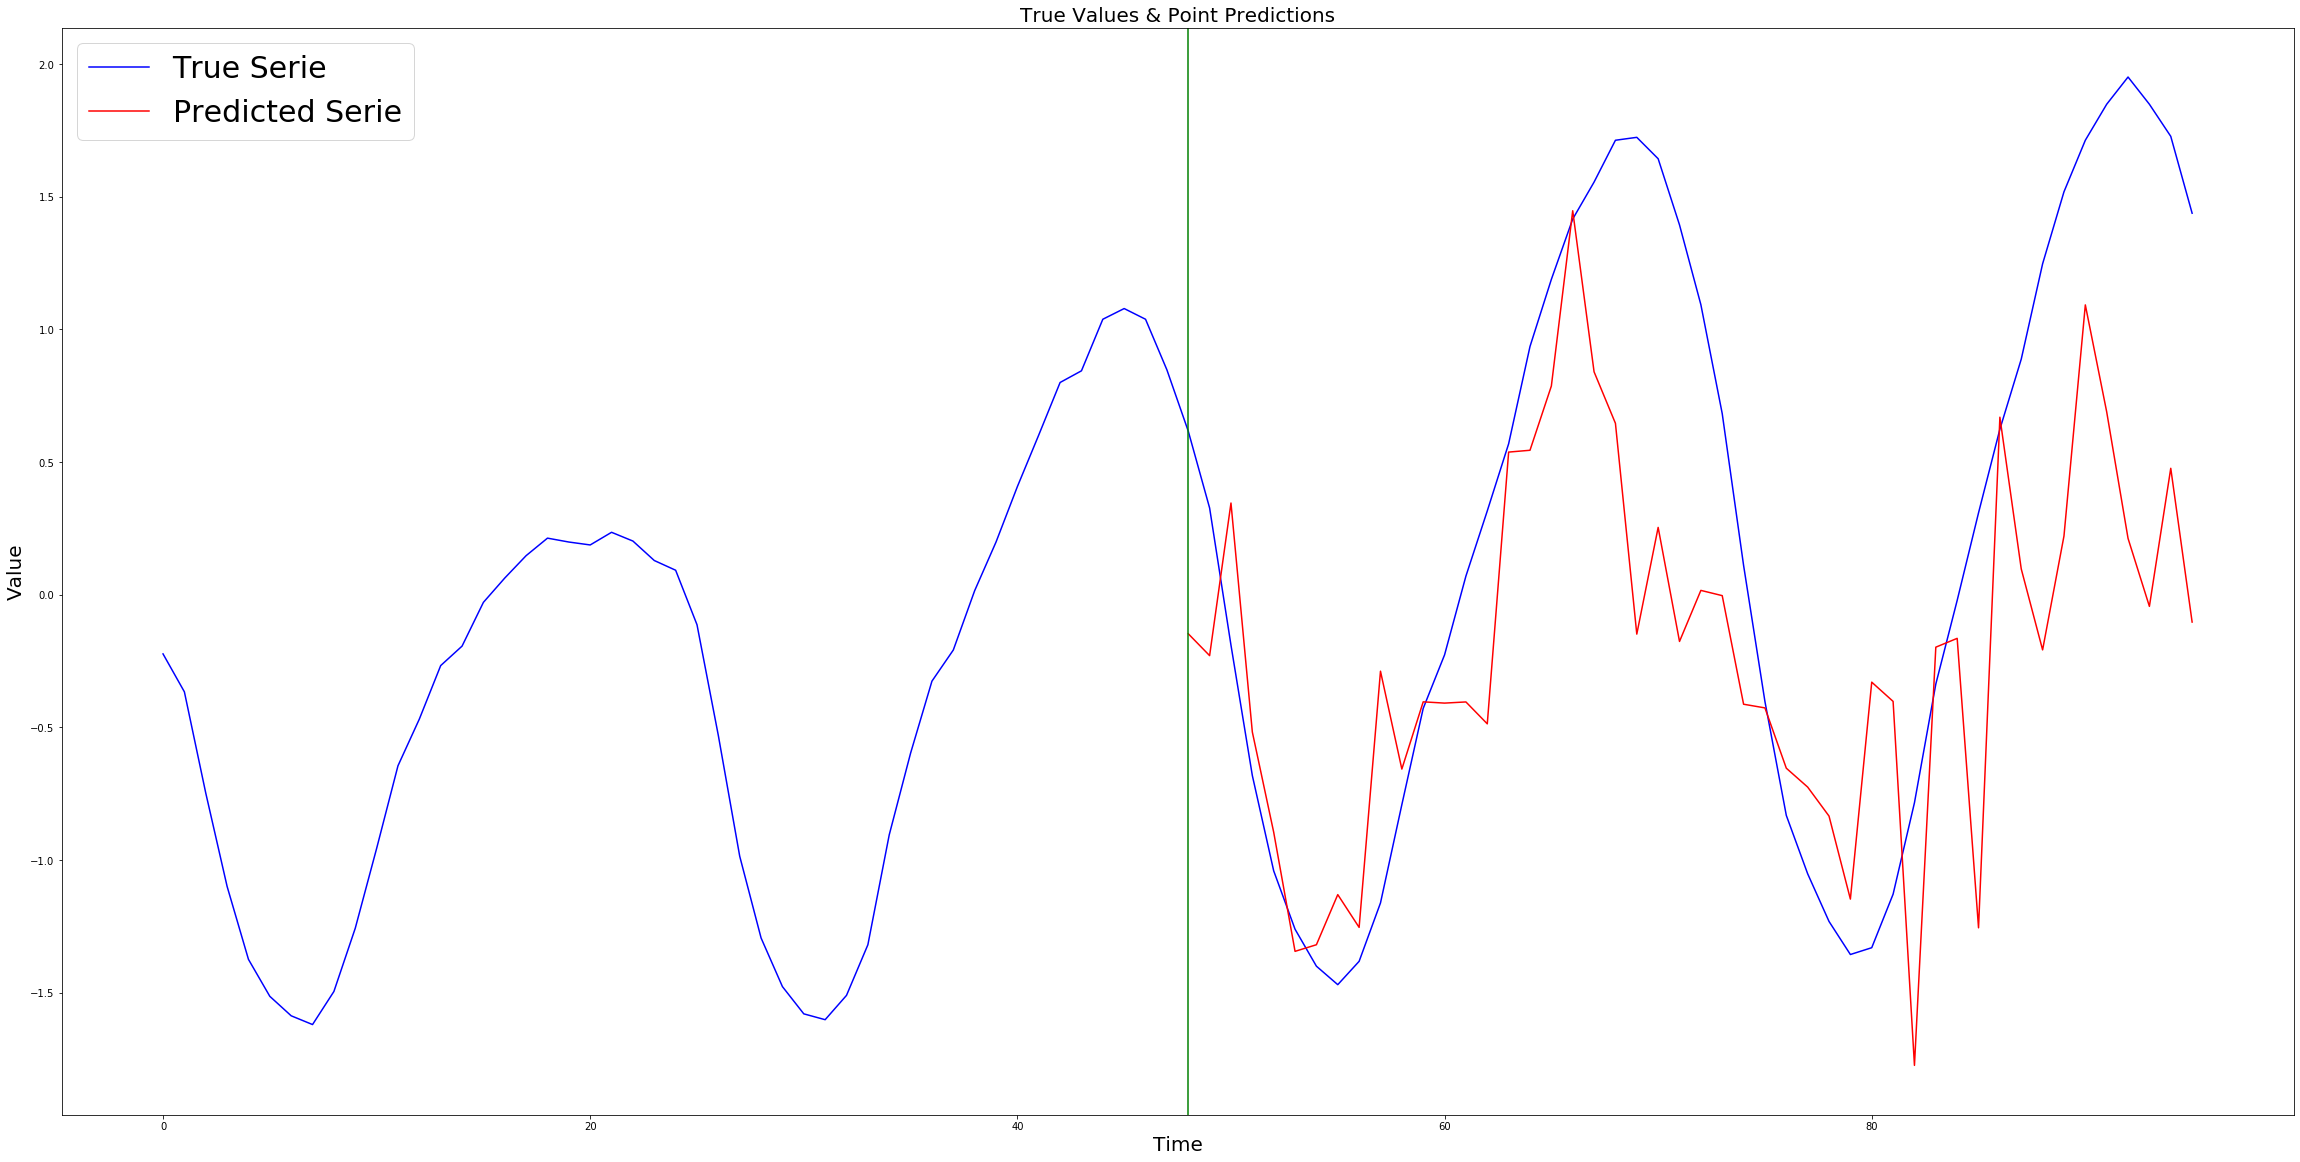

In [14]:
IDX = 2
x = test_x[:BATCH_SIZE,:]
y = test_y[:BATCH_SIZE,:]
#============ Predict Test
predictedY = model.predict(x.reshape(BATCH_SIZE, LOOKBACK, -1 ))
#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(x, y[:,:48], predictedY[:,:48], serie_indx=IDX)

# Evaluate A Model Against An Error Function

In [ ]:
MODEL_NUMBER = 2
MODEL_BASE_DIR = '../models/with_kl/3-LSTM'
hyperparameters, training_error, test_error, validation_error = load_and_evaluate_model(f'{MODEL_BASE_DIR}/{MODEL_NUMBER}', 
                                                                       '../Dataset/Train/Hourly-train.csv', 
                                                                       '../Dataset/Test/Hourly-test.csv', mase)
print(f'Hyperparameters : {hyperparameters}')
print(f'Training Error For Model ({MODEL_NUMBER}) : {training_error}')
print(f'Test Error For Model ({MODEL_NUMBER}) : {test_error}')
print(f'Validation Error For Model ({MODEL_NUMBER}) : {validation_error}')